In [1]:
!pip install pycocotools
!pip install Augmentor

import os, random
import Augmentor
import matplotlib.pyplot as plt

  Obtaining dependency information for pycocotools from https://files.pythonhosted.org/packages/ba/64/0451cf41a00fd5ac4501de4ea0e395b7d909e09d665e56890b5d3809ae26/pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 9.1 MB/s eta 0:00:00:00:01
  Obtaining dependency information for Augmentor from https://files.pythonhosted.org/packages/f3/86/5a91176650eb229ea2cd95551c34c36fba6cd95da3bdc4a5c73fbb1536ca/Augmentor-0.2.12-py2.py3-none-any.whl.metadata


In [4]:
import shutil
INPUT_PATH = r'/kaggle/input/fer2013'
OUTPUT_PATH = "/kaggle/working/fer2013"
# shutil.rmtree(OUTPUT_PATH)
print('Remove old')
shutil.copytree(INPUT_PATH, OUTPUT_PATH)
print('Copied new')

Remove old
Copied new


In [2]:
!git clone https://github.com/dang22mse23054/mse11_capstone
!ls -la

Cloning into 'mse11_capstone'...
remote: Enumerating objects: 1000, done.
remote: Counting objects: 100% (326/326), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 1000 (delta 64), reused 299 (delta 40), pack-reused 674
Receiving objects: 100% (1000/1000), 18.42 MiB | 32.41 MiB/s, done.
Resolving deltas: 100% (541/541), done.
total 16
drwxr-xr-x 4 root root 4096 Mar 15 08:04 .
drwxr-xr-x 5 root root 4096 Mar 15 08:03 ..
drwxr-xr-x 2 root root 4096 Mar 15 08:03 .virtual_documents
drwxr-xr-x 6 root root 4096 Mar 15 08:04 mse11_capstone


In [3]:
!echo "cd mse11_capstone" > git_fetch.sh
!echo "git fetch" >> git_fetch.sh
!echo "git checkout kaggle_emotion" >> git_fetch.sh
!echo "git pull" >> git_fetch.sh
!cat git_fetch.sh

cd mse11_capstone
git fetch
git checkout kaggle_emotion
git pull


In [4]:
!pwd
!bash git_fetch.sh
!cp /kaggle/working/mse11_capstone/source_code/emotion/* ./
!cp -r /kaggle/working/mse11_capstone/source_code/models ./
!cp -r /kaggle/working/mse11_capstone/source_code/common ./
!ls

/kaggle/working
Branch 'kaggle_emotion' set up to track remote branch 'kaggle_emotion' from 'origin'.
Switched to a new branch 'kaggle_emotion'
Already up to date.
augmentation.py  dataset.py    models	       test.py
common		 git_fetch.sh  mse11_capstone  trainer.py
dataloader.py	 model.py      predict.py


In [5]:

FODLER_PATH = '/kaggle/input/fer2013/train'
def plot_num_of_images(training_folder = FODLER_PATH):
    categories = []
    image_counts = []

    for category in os.listdir(training_folder):
        category_path = os.path.join(training_folder, category)
        if os.path.isdir(category_path):
            categories.append(category)
            image_count = len(os.listdir(category_path))
            image_counts.append(image_count)

    plt.figure(figsize=(10, 6))
    plt.bar(categories, image_counts, color='royalblue', width=0.5)
    plt.xlabel('Categories')
    plt.ylabel('Number of Images')
    plt.title('Number of Images in Each Category')
    plt.xticks(rotation=45, fontsize=10)
    plt.show()
    
def augment_data(folder, num_of_images, ):
    if (int(num_of_images) > 0):
        p = Augmentor.Pipeline(folder, folder)

        #p.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
        p.flip_left_right(probability=0.5)
        p.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.5)
        p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)

        p.sample(num_of_images)

        print(f"{num_of_images} augmented images have been saved to {folder}.")

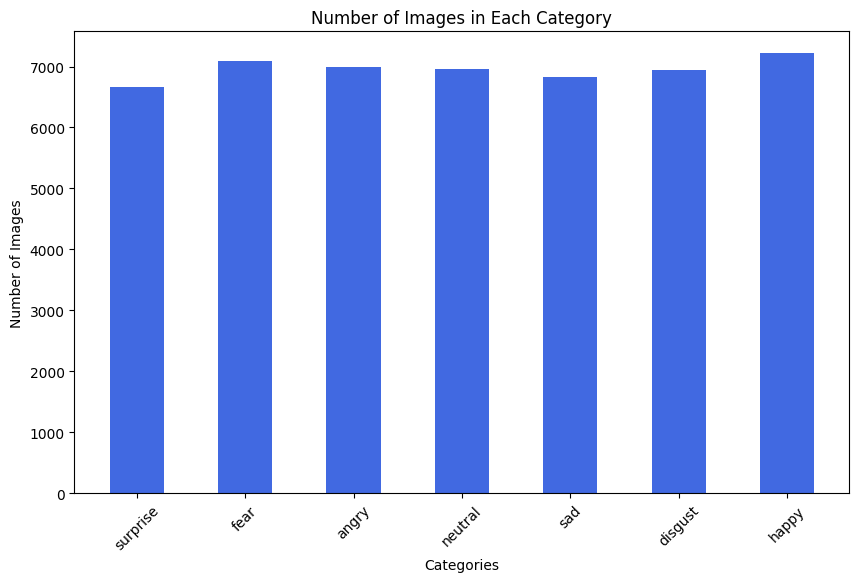

In [6]:
from common.constants import Constants
EMOTION = Constants.Emotion()
plot_num_of_images()

# subfolder_list = os.listdir(FODLER_PATH)
# for folder_name in subfolder_list:
#     num_of_augumented_imgs = EMOTION.Augmentor[folder_name]
#     folder_path = f'{FODLER_PATH}/{folder_name}'
#     print(f'{folder_name} - {num_of_augumented_imgs} - {folder_path}')
#     augment_data(folder_path, num_of_augumented_imgs)
# plot_num_of_images()


In [9]:
# !rm -rf /kaggle/working/*
# !rm -rf /kaggle/working/checkpoint

In [10]:
# !zip -r fer2013_dataset.zip /kaggle/working/fer2013
# !ls -la
# from IPython.display import FileLink
# FileLink(r'fer2013_dataset.zip')

In [8]:
from dataloader import EmotionDataLoader
from model import EmotionDetectionModel
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint, EarlyStopping

if __name__ == "__main__":
    max_epochs = 15

    # modelv1 = EmotionDetectionModel(
    # 	lr = 1e-3,
    # 	momentum = 0.9,
    # 	weight_decay = 1e-4,
    # 	max_epochs = max_epochs    
    # )

    # modelv2 = EmotionDetectionModel(
    # 	lr = 1e-3,
    # 	momentum = 0.9,
    # 	weight_decay = 1e-4,
    # 	max_epochs = max_epochs    
    # )

#     modelv3 = EmotionDetectionModel(
#         lr = 5e-4,
#         weight_decay = 1e-6,
#         max_epochs = max_epochs    
#     )
    
    modelv4 = EmotionDetectionModel(
        lr = 1e-3,
        weight_decay = 1e-4,
        max_epochs = max_epochs    
    )
    
    datav4 = EmotionDataLoader(batch_size=64, workers=4, img_size = 299)


    trainer = Trainer(
        # accelerator="cpu",
        accelerator="gpu",
        # checkpoint_callback=True,
        callbacks = [
            LearningRateMonitor(logging_interval='step'),
            # ModelCheckpoint(filename='{epoch}-{val_loss:.4f}', save_top_k=2, monitor='val_loss', mode='min'),

            # version 1
            # EarlyStopping(monitor='val_loss', patience=11, min_delta=0.00005, verbose=True),

            # version 2
#             EarlyStopping(monitor='val_loss', patience=5, verbose=True),

            # version 3
#             ModelCheckpoint(filename='{epoch}-{val_acc:.4f}', save_top_k=2, monitor='val_acc', mode='max'),
#             EarlyStopping(monitor='val_acc', patience=7, min_delta=0.0001, verbose=True),
            
            # Inception_v3
            ModelCheckpoint(filename='{epoch}-{val_acc:.4f}', save_top_k=2, monitor='val_acc', mode='max'),
            EarlyStopping(monitor='val_acc', patience=10, min_delta=0.0001, verbose=True),
        ], 
        # check_val_every_n_epoch=1,
        fast_dev_run=False,
        default_root_dir='checkpoint',
        max_epochs=max_epochs,       
    )

    # trainer.fit(modelv1, data)
    # trainer.fit(modelv2, data)
#     trainer.fit(modelv3, data)
    trainer.fit(modelv4, datav4)   
    

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [9]:
!zip -r file.zip /kaggle/working/checkpoint
!ls -la
from IPython.display import FileLink
FileLink(r'file.zip')

  adding: kaggle/working/checkpoint/ (stored 0%)
  adding: kaggle/working/checkpoint/lightning_logs/ (stored 0%)
  adding: kaggle/working/checkpoint/lightning_logs/version_1/ (stored 0%)
  adding: kaggle/working/checkpoint/lightning_logs/version_1/hparams.yaml (deflated 8%)
  adding: kaggle/working/checkpoint/lightning_logs/version_1/checkpoints/ (stored 0%)
  adding: kaggle/working/checkpoint/lightning_logs/version_1/checkpoints/epoch=8-val_acc=0.7529.ckpt (deflated 7%)
  adding: kaggle/working/checkpoint/lightning_logs/version_1/checkpoints/epoch=9-val_acc=0.7520.ckpt (deflated 7%)
  adding: kaggle/working/checkpoint/lightning_logs/version_1/events.out.tfevents.1710490488.87a72693549b.26.1 (deflated 68%)
  adding: kaggle/working/checkpoint/lightning_logs/version_0/ (stored 0%)
  adding: kaggle/working/checkpoint/lightning_logs/version_0/hparams.yaml (deflated 8%)
  adding: kaggle/working/checkpoint/lightning_logs/version_0/events.out.tfevents.1710489910.87a72693549b.26.0 (deflated 27

/kaggle/working/file.zip

In [10]:
import torch
from dataloader import EmotionDataLoader
from model import EmotionDetectionModel
from pytorch_lightning import Trainer

if __name__ == "__main__":
    ckp_file = '/kaggle/working/checkpoint/lightning_logs/version_0/checkpoints/epoch=13-val_acc=0.7565.ckpt'
    checkpoint = torch.load(ckp_file)
    model = EmotionDetectionModel()
    model.load_state_dict(checkpoint['state_dict'])

    data = EmotionDataLoader(batch_size=64, workers=4)

    trainer = Trainer(
        # accelerator="cpu",
        accelerator="gpu",
    )

    trainer.test(model, data)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_loss_epoch      │     2.313149929046631     │
│          val_acc          │    0.6358130574226379     │
└───────────────────────────┴───────────────────────────┘